In [88]:
# import the required packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [89]:
# read the data from csv file ad load it into data frame called 'data'
data = pd.read_csv("./train.csv")

# print the data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


As Id column will not give any intrepretations to the data so remove the columns

In [90]:
#removing Id column
data = data.drop(columns=['Id'])

In [91]:
# print the number of rows and cloumns present in the data frame
data.shape

(1460, 80)

In [92]:
# Checking descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [93]:
# print the columns information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Step 2: Basic Data Cleanup

From the above data.info() function we can see lot of columns is having the very less non-null values that means those columns is having missing data. So get the missing data information in terms of percentage.

In [94]:
## get the percentage of missing values in percentage and print it in descending order
## print the columns where missing percentage > 0
missing_perc = data.isnull().sum()/len(data)*100
missng_data = missing_perc[missing_perc > 0]
missng_data.sort_values(inplace=True, ascending=False)
missng_data

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

From the above data we can see there are 19 columns have missing values.
Out of 19 columns PoolQC, MiscFeature, Alley, Fence and FireplaceQu have very high percentage of missing values.
So first we have to understand these columns as they are actually missing or these have some meaning. Once it's identified, imputation can be performed.

By exploring the data dictionary of this data, it's mentioned that, NA for below features denote that these features are not Available for the house:

**'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'**

So here, we will replace NaN values for above attributes with 'Not Available'.

In [95]:
# Replacing NaN with 'Not Available' for below columns
cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
for col in cols:
    data[col].fillna("Not Available", inplace=True)

In [96]:
# now check the percentage of missing values of the data frame
missing_perc = data.isnull().sum()/len(data)*100
missng_data = missing_perc[missing_perc > 0]
missng_data.sort_values(inplace=True, ascending=False)
missng_data

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

Performing Statistical Imputation for missing values in LotFrontage, GarageYrBlt, MasVnrType, MasVnrArea, Electrical columns

columns LotFrontage, GarageYrBlt, MasVnrType are numeric in nature so replace nan values with median value

columns MasVnrArea, Electrical are categorical in nature so replace nan values with mode

In [97]:
# columns LotFrontage, GarageYrBlt, MasVnrType are numeric in nature so replace nan values with median value
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace= True)
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace= True)

# columns MasVnrArea, Electrical are categorical in nature so replace nan values with mode
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0], inplace= True)
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace= True)

In [98]:
# now check the percentage of missing values of the data frame
missing_perc = data.isnull().sum()/len(data)*100
missng_data = missing_perc[missing_perc > 0]
missng_data.sort_values(inplace=True, ascending=False)
missng_data

Series([], dtype: float64)

## Step 3: Exploratory Data Analysis

In this step get the numrical and categorical data separately and do exploratory data analysis 

#### Get numerical data and Perform Numerical Data Analysis

In [99]:
# get the only numeric data from actual data
data_numeric = data.select_dtypes(exclude='object')
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [100]:
# get the numerical column names
num_columns = list(data_numeric.columns)
print(num_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Now plot the all the numerical columns vs Sale Price to see how the data is behaving with Sale Price

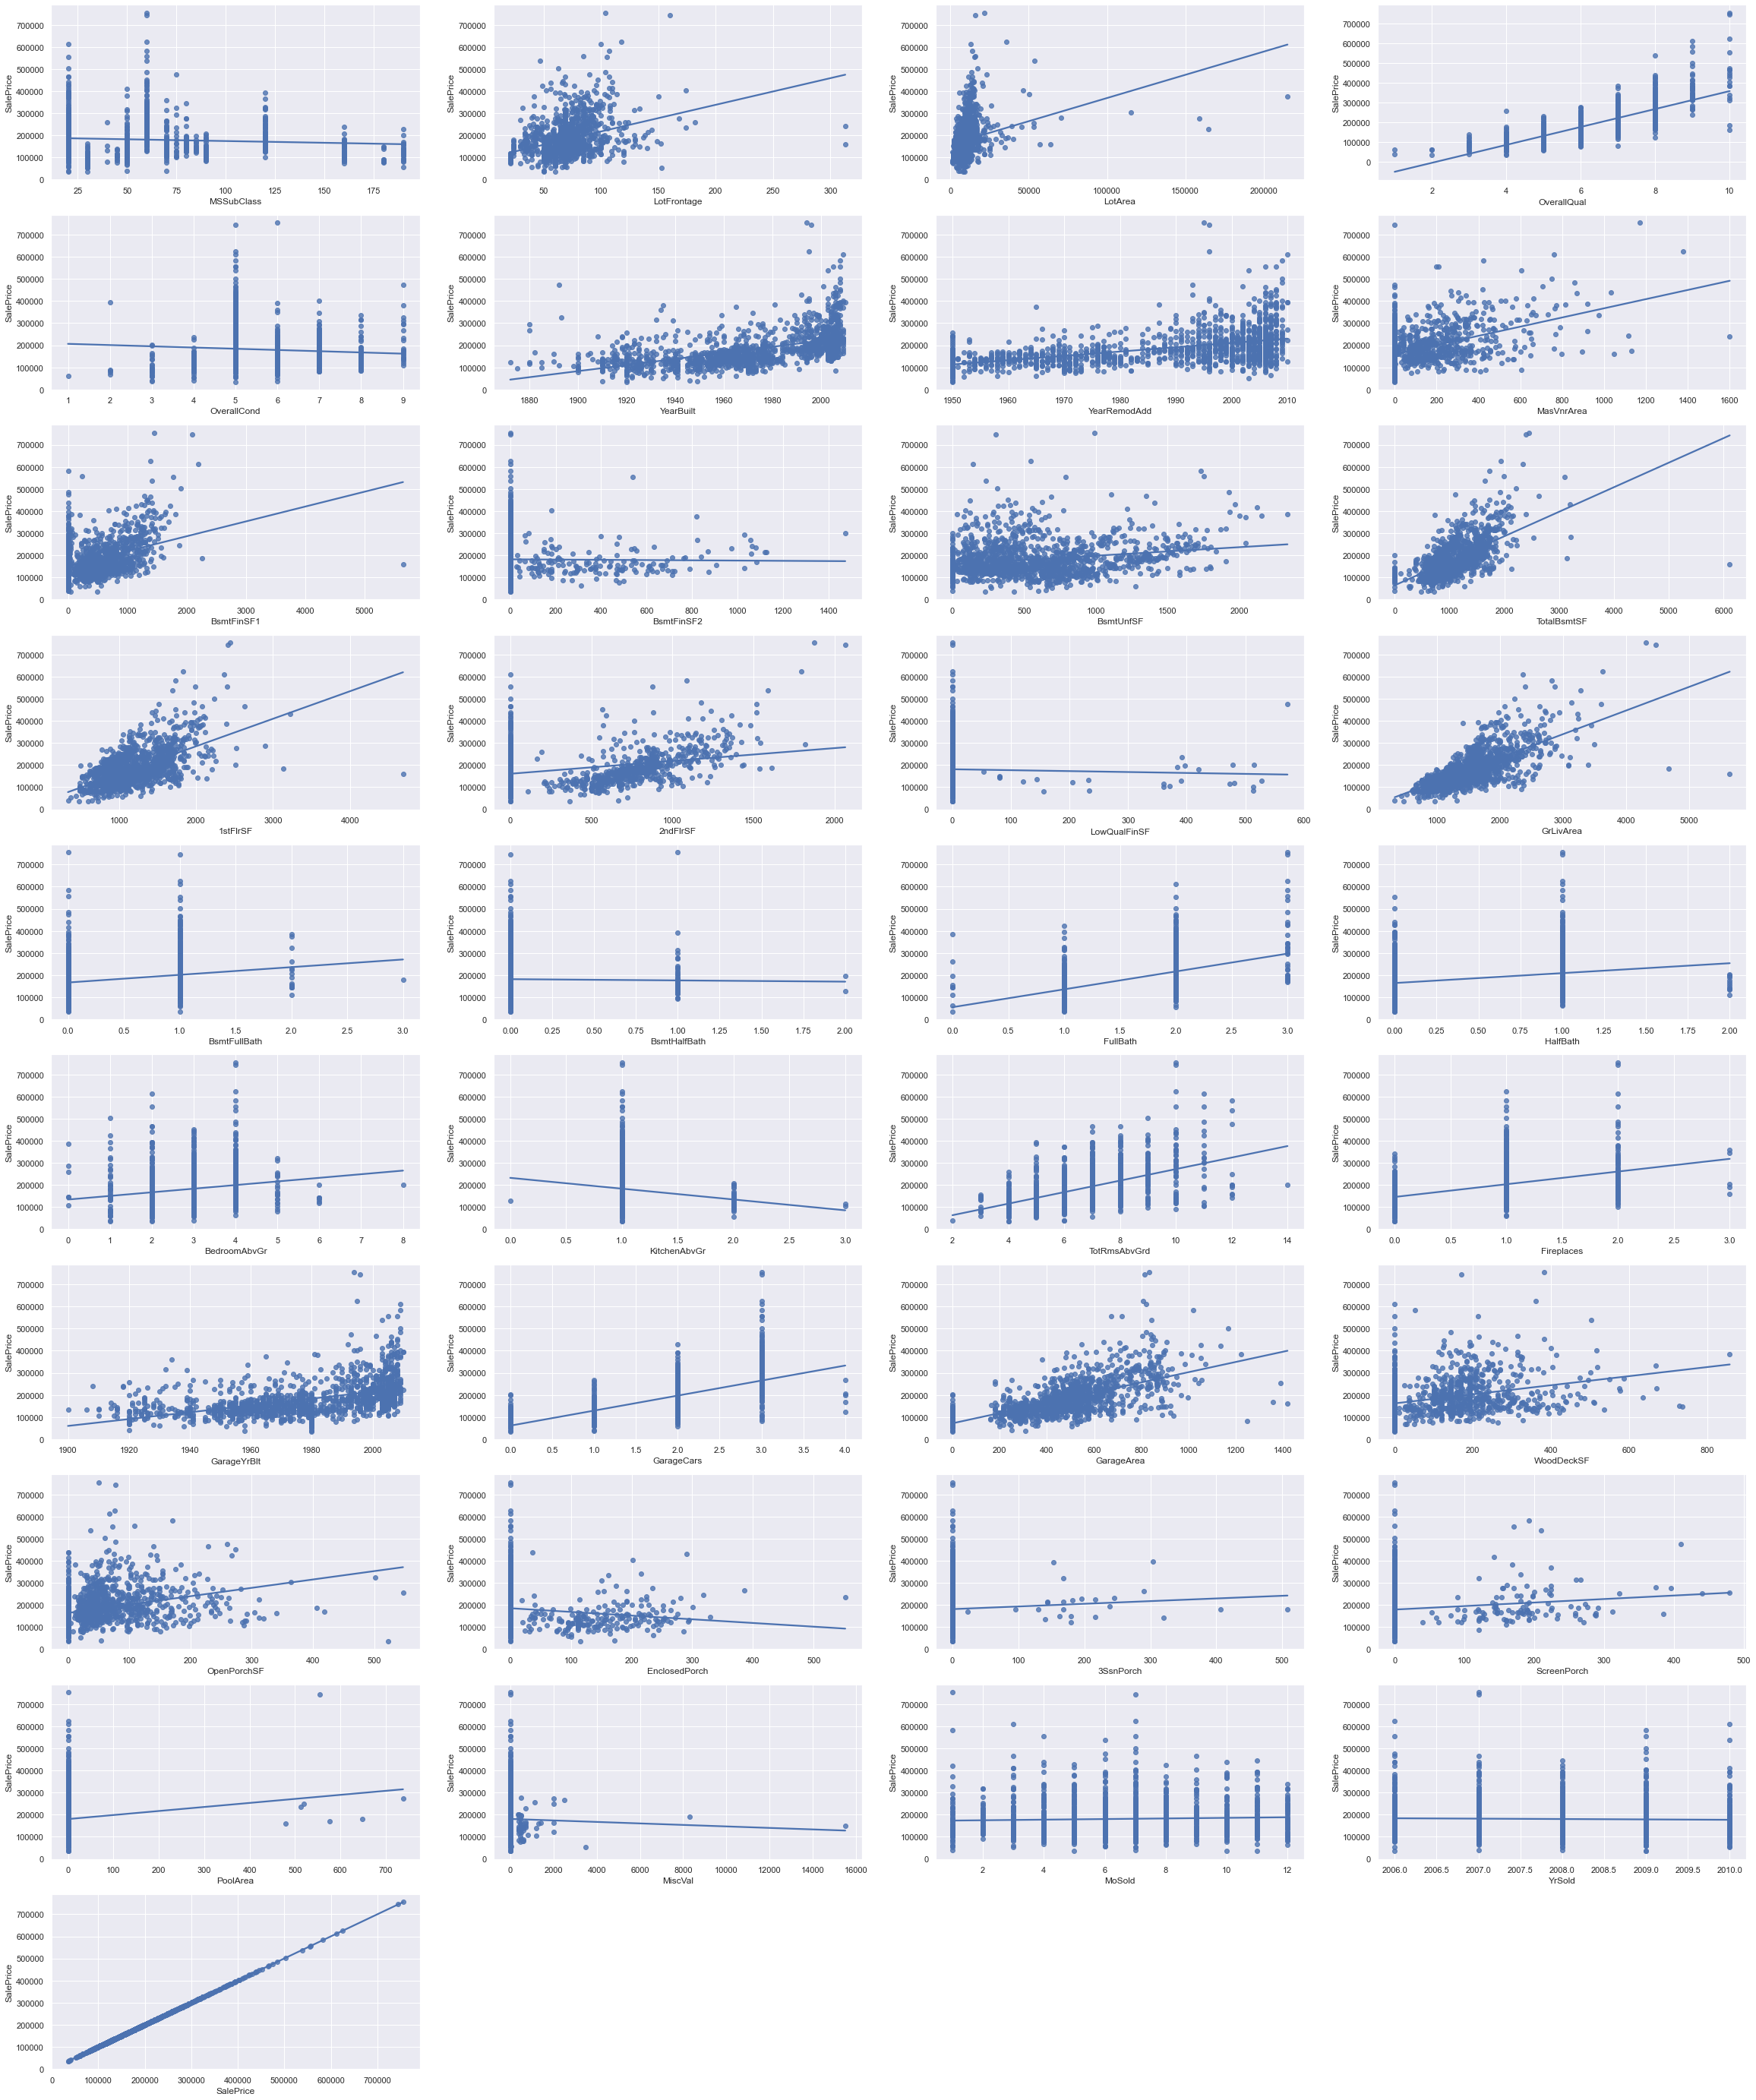

In [101]:
# plot all the numeric columns vs SalePrice columns
plt.figure(figsize=[40, 50])
for i, col in enumerate(num_columns):
    plt.subplot(10, 4, i+1)
    sns.regplot(x = col, y = "SalePrice", ci = None, data = data)
plt.show()

From the above plots we can see some of the variables is having good corelation with SalePrice and Some are having less corelation.

Based on the above plots below are the variables having corelation with SalePrice.
'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'

Now look into the corelation matrix for numerical data

In [102]:
# correlation matrix of numeric data
cor = data_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


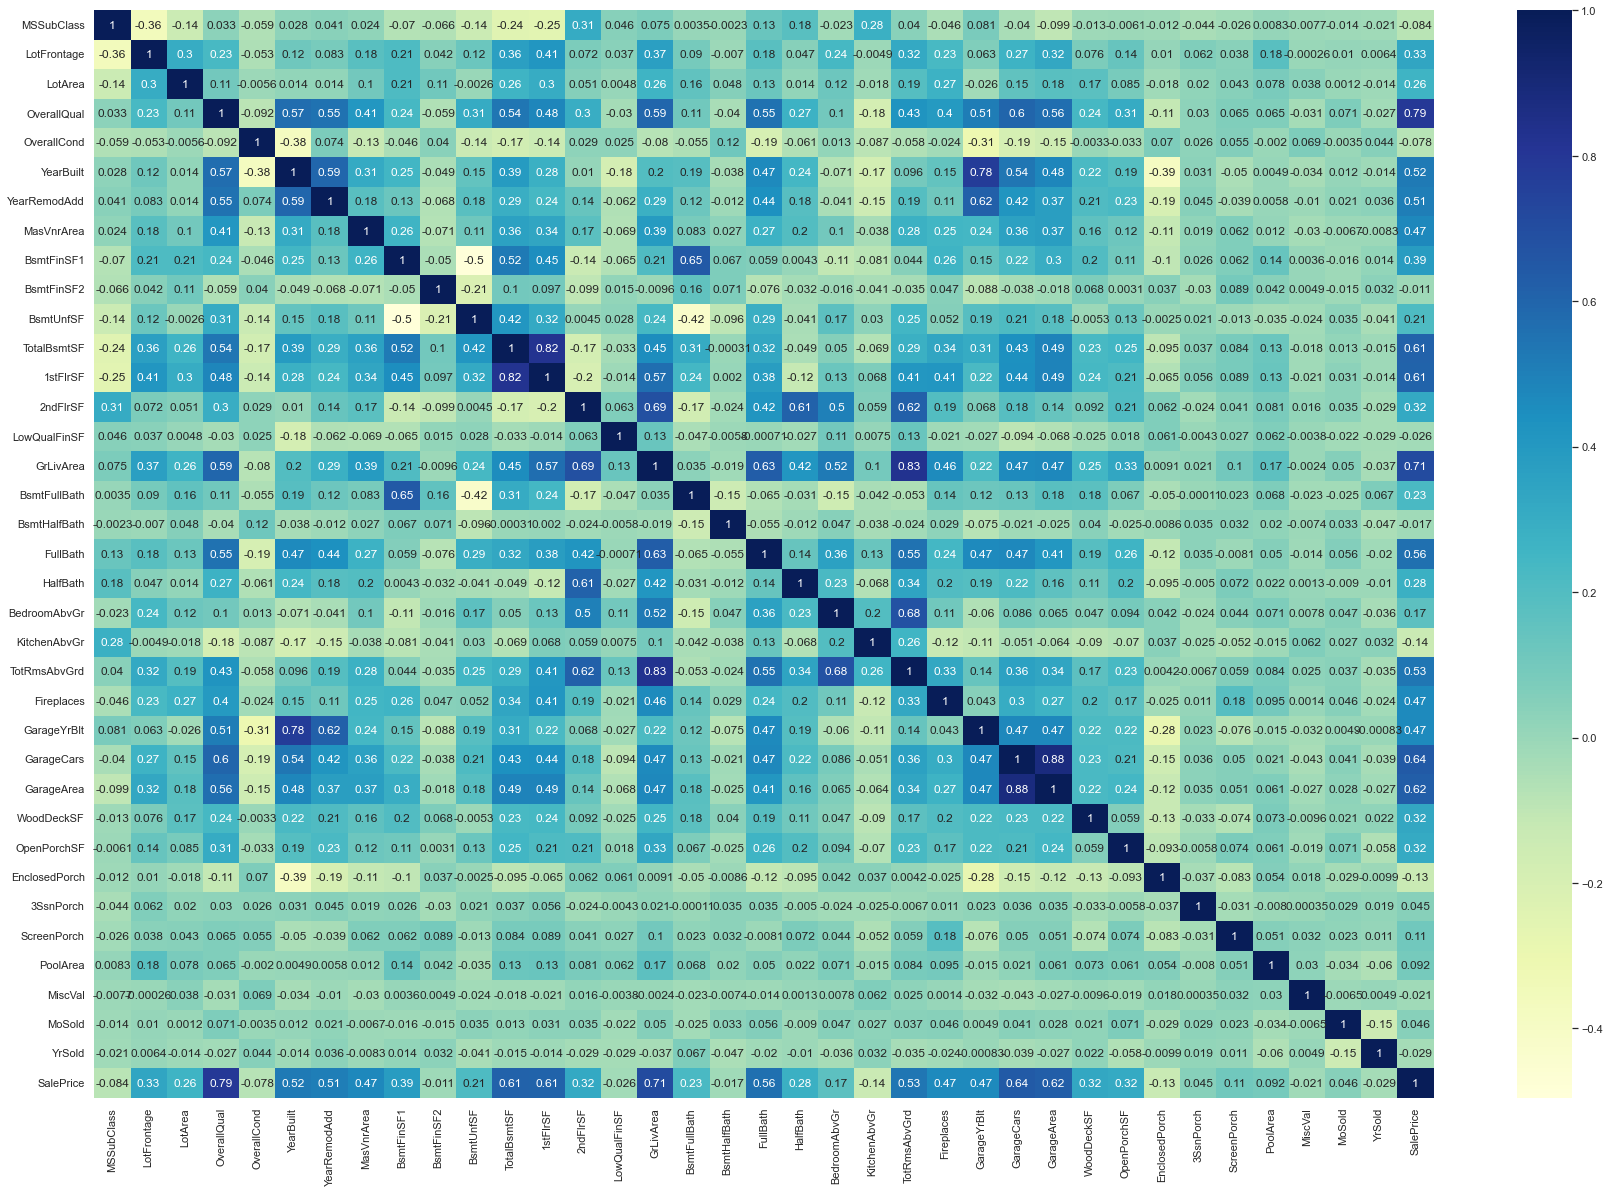

In [103]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(30,20))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Instead of taking all the parameters I am taking the Parameters where corelation between SalePrice and Column is >= 0.3

In [104]:
# get the columns where the corelation between SalePrice and Column is >= 0.3
significant_num_cols = []
s = cor.unstack()
for i in range(0, len(s['SalePrice'])):
    if (abs(s['SalePrice'][i]) >= 0.30):
        significant_num_cols.append(s['SalePrice'].index[i])
print(significant_num_cols)
print(len(significant_num_cols))

['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
19


With the above condition we got 18 numerical variables by excluding the target variable

From the above correlation matrix and heatmap, we can see that some of the variables are correlated each other. 

- GarageCars and GarageArea -> 0.88
- TotalBsmtSF and 1stFlrSF -> 0.82
- GrLivArea and TotRmsAbvGrd -> 0.83
- GarageYrBlt and YearBuilt -> 0.78

 So before dropping these columns, we will first check their predictive power.

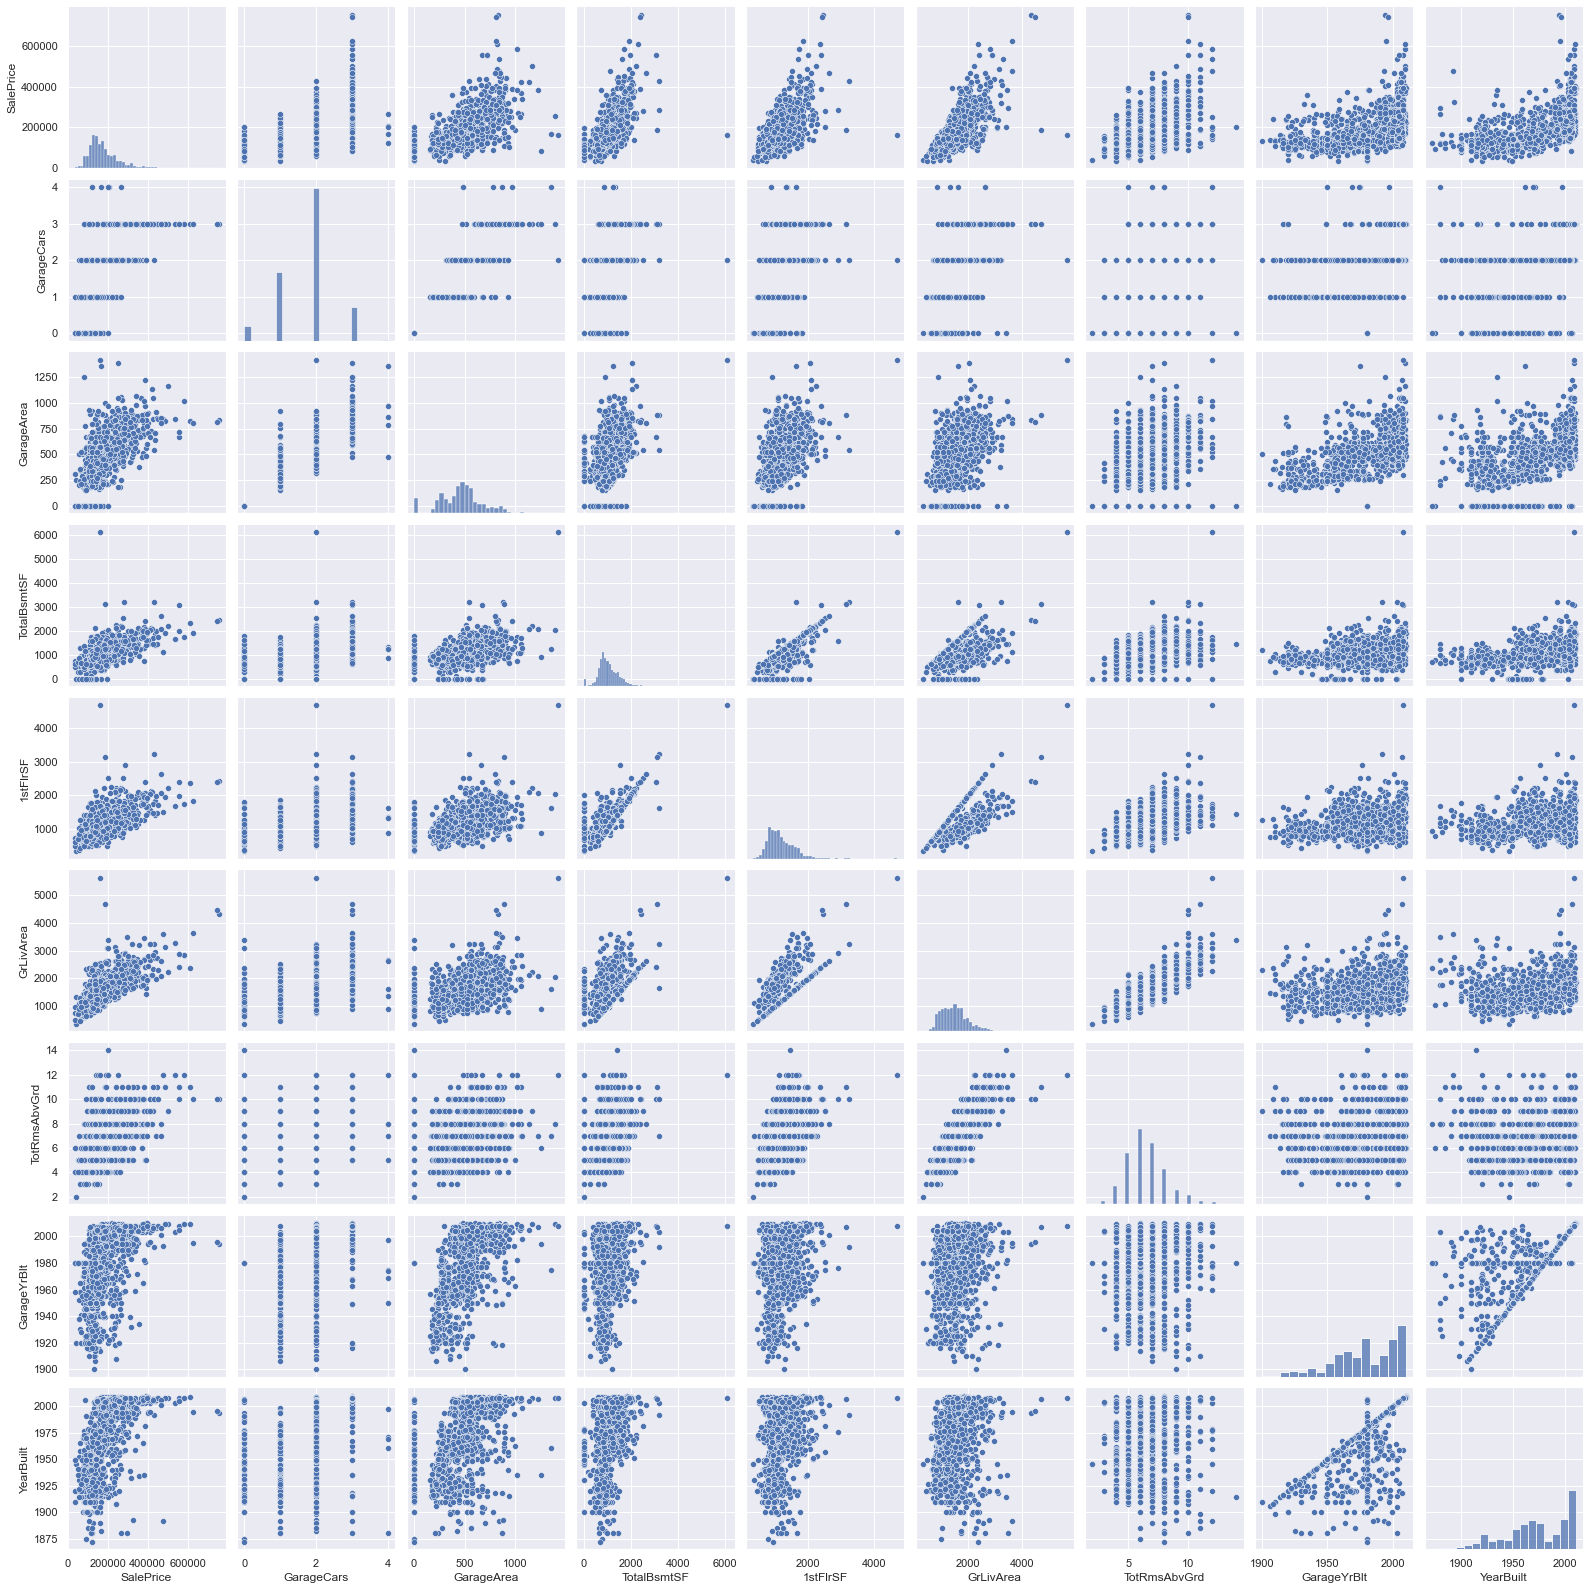

In [105]:
# plot the all the numeric variables using pair plot
sns.set()
cols = ['SalePrice', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'YearBuilt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

Frome the above plots we can see the columns 'GarageCars', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageYrBlt' is not much contributing to SalePrice.
So Drop these columns also.

In [106]:
# drop the columns from the original data frame
num_drop_columns = ['GarageCars', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageYrBlt']
data = data.drop(columns=num_drop_columns, axis=1)

In [107]:
data.shape

(1460, 76)

In [108]:
# now get the final significant numerical columns list
final_num_cols = [col for col in significant_num_cols if col not in num_drop_columns]
print(final_num_cols)
print(len(final_num_cols))

['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
15


Now plot the distribution of the Target Variable and see wheather its following Normal Distribution or not

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

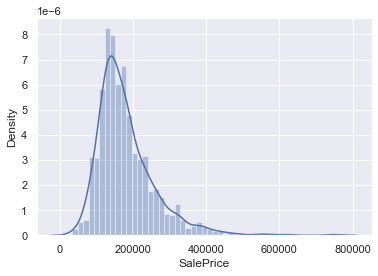

In [109]:
# check the distribution of target variable SalePrice
sns.distplot(data['SalePrice'])

From the above plot we can see target variable SalePrice is Right skewed. So we can perform log transformation to remove the skewness. We will do this transformation in Data Preparation Step.

#### Get Categorical data and Perform Categorical Data Analysis

In [110]:
# get the only categorical data from actual data
data_categorical = data.select_dtypes(include='object')
data_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Not Available,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Not Available,Not Available,Not Available,WD,Normal
1,RL,Pave,Not Available,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Not Available,Not Available,Not Available,WD,Normal
2,RL,Pave,Not Available,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Not Available,Not Available,Not Available,WD,Normal
3,RL,Pave,Not Available,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Not Available,Not Available,Not Available,WD,Abnorml
4,RL,Pave,Not Available,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Not Available,Not Available,Not Available,WD,Normal


In [111]:
# print number of rows and columns
data_categorical.shape

(1460, 43)

In [112]:
for col in data_categorical.columns:
    print("\nColumn : ", col)
    print(data[col].value_counts())


Column :  MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Column :  Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Column :  Alley
Not Available    1369
Grvl               50
Pave               41
Name: Alley, dtype: int64

Column :  LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Column :  LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Column :  Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Column :  LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Column :  LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Column :  Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor

From the above information we can see that lof of variable having very less variance in data.
So selecting the below columns which is having good variance in data.

['LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish']

In [113]:
final_cat_cols = ['LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish']
print(len(final_cat_cols))

16


now plot these columns with respect to SalePrice and see how they are behaving

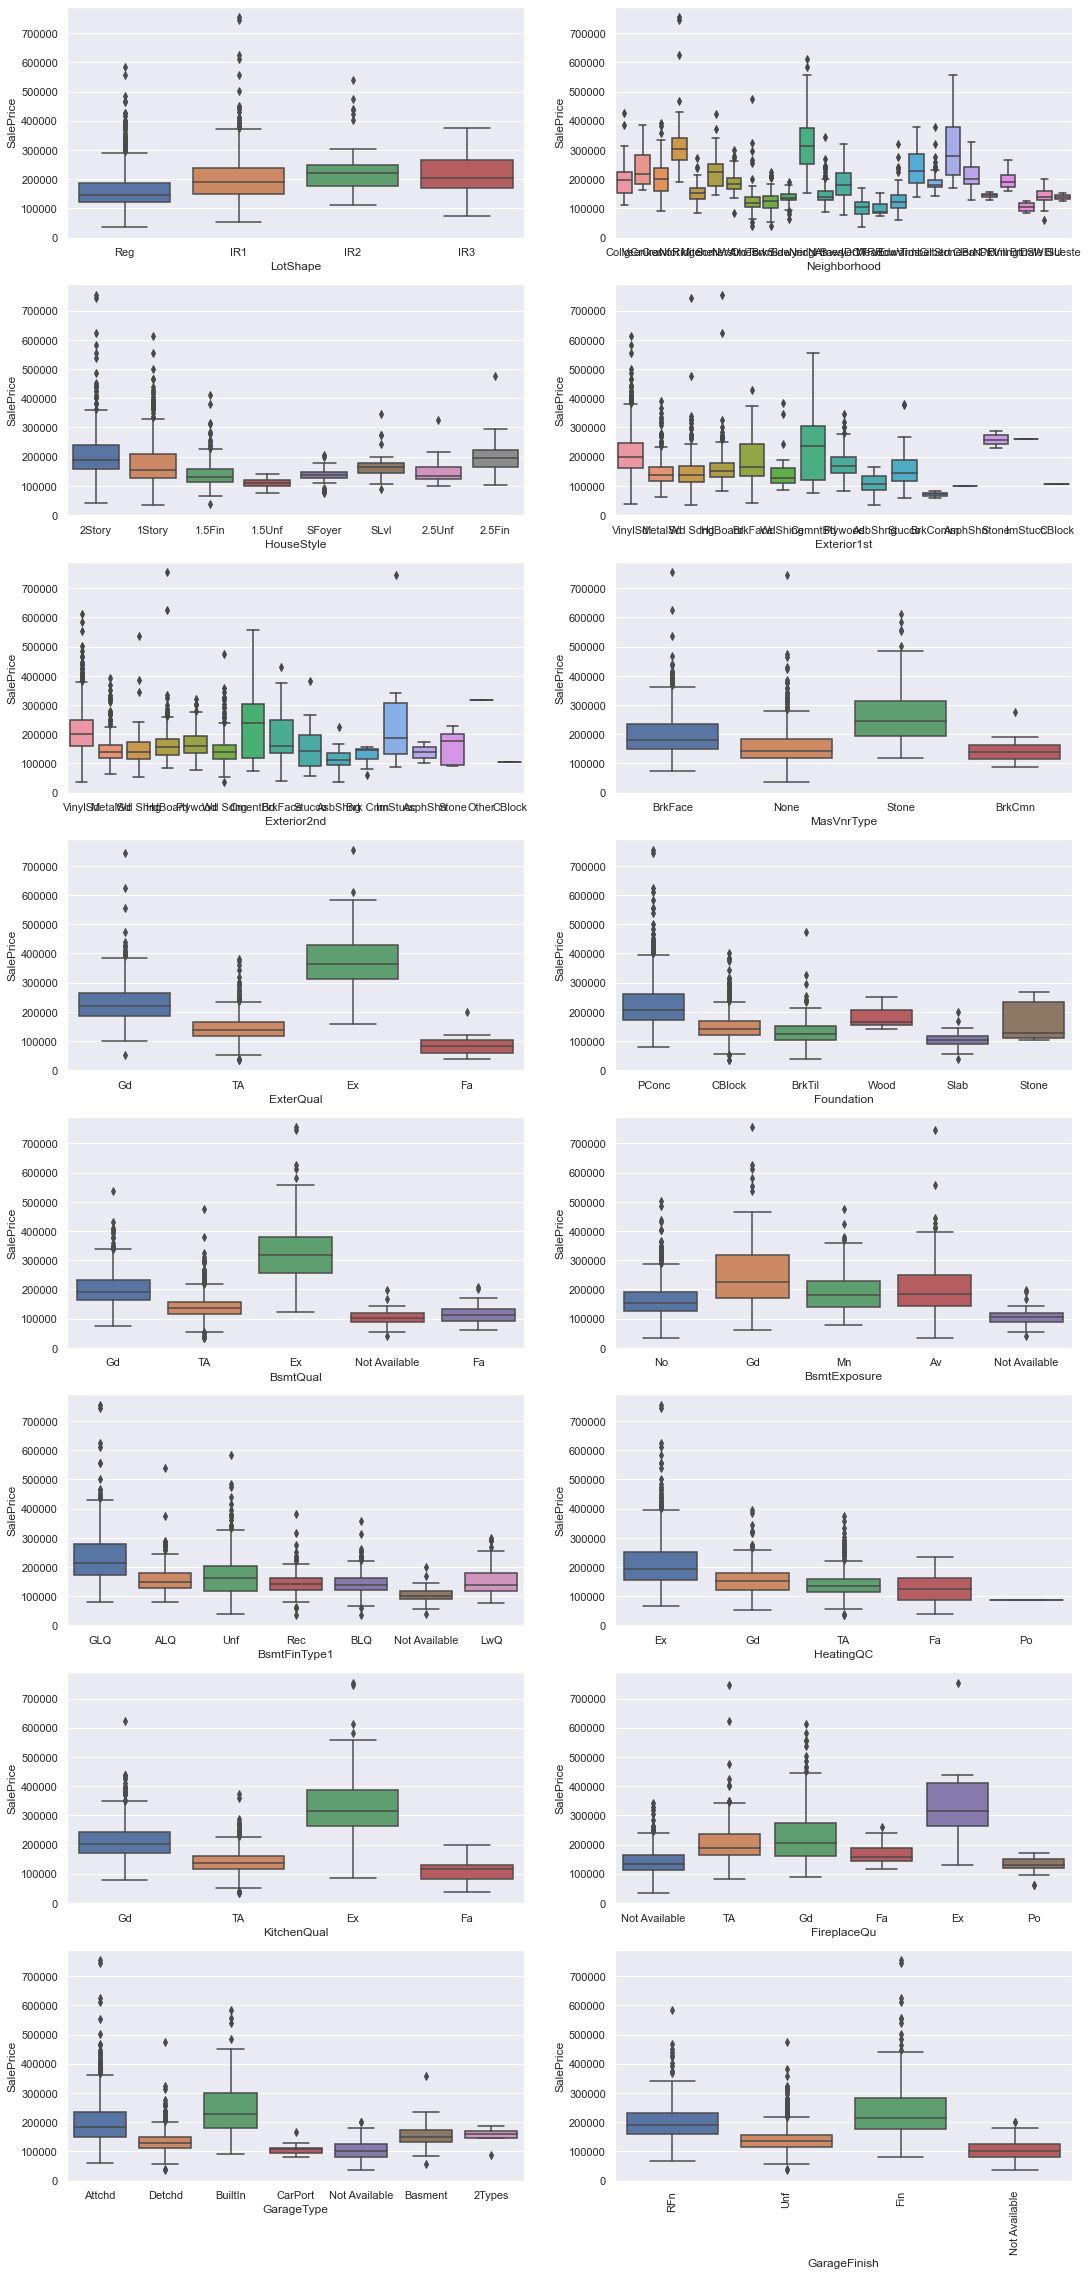

In [114]:
plt.figure(figsize=[18, 40])

for i, col in enumerate(final_cat_cols):
    plt.subplot(8, 2, i+1)
    x_label= col
    fig= sns.boxplot(data=data, x=col, y='SalePrice')
    fig.set_xlabel(x_label)

plt.xticks(rotation=90)
plt.show()

From the above plots we can draw below insights:

SalePrice is high for houses having Neighbourhood : Northridge Heights, Stone Brook, Northridge. price is comparatively lower in Iowa DOT and Rail Road, Meadow Village neighbourhood.

Median SalePrice is higher for the houses with higher OverallQual rating. Houses with Excellent quality of the material on the exterior have highest price. Price reduces as quality decreases.

Median SalePrice is higher for the houses having Excellent Heating quality and median price reduces with Heating quality type and least for the houses having Poor heating quality.

Houses having a garage as part of the house (typically has room above garage) and garage interior 'finish' or 'Rough Finished', have higest median SalePrice. Price is lower for the houses having no garage.

Houses having atleast 1 fireplace, have higher median SalePrice. If Fireplace quality is 'Excellent - Exceptional Masonry Fireplace' then the median SalePrice is the highest.

Houses having Poured Contrete foundation has higher SalePrice. Price for houses having Stone and Wood foundations is positive skewed.


Since the dataset is small it isn't advisable to do remove outliers.

## Step 4. Data Preparation 

Let's now prepare the data and build the model.

In [115]:
final_data = data[final_num_cols + final_cat_cols]

In [116]:
final_data.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,65.0,7,2003,2003,196.0,706,856,854,1710,2,...,Gd,PConc,Gd,No,GLQ,Ex,Gd,Not Available,Attchd,RFn
1,80.0,6,1976,1976,0.0,978,1262,0,1262,2,...,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,68.0,7,2001,2002,162.0,486,920,866,1786,2,...,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,60.0,7,1915,1970,0.0,216,961,756,1717,1,...,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,84.0,8,2000,2000,350.0,655,1145,1053,2198,2,...,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn


In [117]:
final_data.shape

(1460, 31)

Earlier we have already seen that our target variable SalePrice is heavily right skewed. We can perform log transformation to remove the skewness

In [118]:
#apply log transformation on SalePrice column and store the results in new column called 'SalePrice_log'
final_data['SalePrice_log']=np.log(final_data['SalePrice'])

<AxesSubplot:xlabel='SalePrice_log', ylabel='Density'>

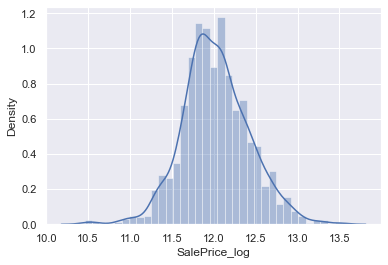

In [119]:
# check the distribution of  variable SalePrice_log
sns.distplot(final_data['SalePrice_log'])

As you can see in the above plot after log transformation target variable is following normal distribution

In [120]:
# As we have SalePrice_log variable, so we can drop SalePrice Column
final_data = final_data.drop(columns=['SalePrice'], axis=1)

In [121]:
final_data.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SalePrice_log
0,65.0,7,2003,2003,196.0,706,856,854,1710,2,...,PConc,Gd,No,GLQ,Ex,Gd,Not Available,Attchd,RFn,12.247694
1,80.0,6,1976,1976,0.0,978,1262,0,1262,2,...,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn,12.109011
2,68.0,7,2001,2002,162.0,486,920,866,1786,2,...,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn,12.317167
3,60.0,7,1915,1970,0.0,216,961,756,1717,1,...,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf,11.849398
4,84.0,8,2000,2000,350.0,655,1145,1053,2198,2,...,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn,12.429216


In [122]:
final_data.shape

(1460, 31)

In [123]:
# splitting the data into X and y
X = final_data.drop(['SalePrice_log'], axis=1) # predictors in variable X
y = final_data['SalePrice_log'] # response variable in Y

In [124]:
X.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,65.0,7,2003,2003,196.0,706,856,854,1710,2,...,Gd,PConc,Gd,No,GLQ,Ex,Gd,Not Available,Attchd,RFn
1,80.0,6,1976,1976,0.0,978,1262,0,1262,2,...,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,68.0,7,2001,2002,162.0,486,920,866,1786,2,...,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,60.0,7,1915,1970,0.0,216,961,756,1717,1,...,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,84.0,8,2000,2000,350.0,655,1145,1053,2198,2,...,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn


Creating Dummy columns to convert categorical into numerical

In [125]:
# creating dummy variables for categorical variables
# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,Reg,CollgCr,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Not Available,Attchd,RFn
1,Reg,Veenker,1Story,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,IR1,CollgCr,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,IR1,Crawfor,2Story,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,IR1,NoRidge,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn


In [126]:
# convert into dummies - one hot encoding
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not Available,GarageFinish_Not Available,GarageFinish_RFn,GarageFinish_Unf
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [127]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [128]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [129]:
X.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not Available,GarageFinish_Not Available,GarageFinish_RFn,GarageFinish_Unf
0,65.0,7,2003,2003,196.0,706,856,854,1710,2,...,0,1,0,0,0,0,0,0,1,0
1,80.0,6,1976,1976,0.0,978,1262,0,1262,2,...,1,1,0,0,0,0,0,0,1,0
2,68.0,7,2001,2002,162.0,486,920,866,1786,2,...,1,1,0,0,0,0,0,0,1,0
3,60.0,7,1915,1970,0.0,216,961,756,1717,1,...,0,0,0,0,0,1,0,0,0,1
4,84.0,8,2000,2000,350.0,655,1145,1053,2198,2,...,1,1,0,0,0,0,0,0,1,0


In [130]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_Not Available', 'GarageFinish_Not Available',
       'GarageFinish_RFn', 'GarageFinish_Unf'],
      dtype='object', length=123)

In [131]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [132]:
X_train.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not Available,GarageFinish_Not Available,GarageFinish_RFn,GarageFinish_Unf
210,-0.130049,-0.795151,-1.532424,-1.689368,-0.570750,0.053428,-0.772733,-0.795163,-1.240174,-1.026041,...,-0.522385,-1.214321,-0.114827,-0.253259,-0.078757,-0.600559,4.126099,4.126099,-0.637614,-0.841191
318,0.914450,0.651479,0.719786,0.394133,0.846202,1.191731,0.541779,2.124318,2.152171,0.789741,...,1.914298,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.242360,-0.242360,1.568348,-0.841191
239,-0.811244,-0.071836,-0.870009,-1.689368,-0.570750,-0.766852,-0.943516,0.783740,-0.054186,-1.026041,...,-0.522385,-1.214321,-0.114827,-0.253259,-0.078757,1.665116,-0.242360,-0.242360,-0.637614,1.188791
986,-0.493353,-0.071836,-2.029235,0.878668,-0.570750,-0.973018,-0.418229,0.657703,0.227558,-1.026041,...,-0.522385,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.242360,-0.242360,-0.637614,1.188791
1416,-0.447940,-1.518467,-2.857254,-1.689368,-0.570750,-0.973018,0.215738,1.597253,1.474464,0.789741,...,-0.522385,-1.214321,-0.114827,-0.253259,-0.078757,1.665116,-0.242360,-0.242360,-0.637614,1.188791


In [133]:
X_test.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not Available,GarageFinish_Not Available,GarageFinish_RFn,GarageFinish_Unf
1436,-0.447940,-1.518467,-0.008870,-0.671845,-0.570750,0.378031,-0.772733,-0.795163,-1.240174,-1.026041,...,-0.522385,-1.214321,-0.114827,-0.253259,-0.078757,1.665116,-0.24236,-0.24236,-0.637614,1.188791
57,0.869037,0.651479,1.084115,0.927122,-0.570750,-0.973018,-0.783083,1.175601,0.389370,0.789741,...,-0.522385,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.24236,1.568348,-0.841191
780,-0.311701,0.651479,0.786028,0.539493,-0.360421,-0.973018,0.233852,-0.795163,-0.499645,0.789741,...,1.914298,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.24236,-0.637614,-0.841191
382,0.414907,0.651479,1.150356,1.024029,-0.570750,-0.973018,-0.578661,1.171018,0.535953,0.789741,...,-0.522385,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.24236,1.568348,-0.841191
1170,0.278668,-0.071836,0.189854,-0.381123,-0.570750,0.171865,-0.115477,-0.795163,-0.756641,-1.026041,...,-0.522385,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.24236,-0.637614,-0.841191


In [134]:
print(X_train.shape)
print(X_test.shape)

(1021, 123)
(438, 123)


## Setp 5: Model Building and Evaluation

### Linear Regression
Let's now try predicting Sale prices using linear regression.

In [135]:
# Instantiate linear regression model
lm = LinearRegression()

# Fit the model
lm.fit(X_train, y_train)

LinearRegression()

In [136]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-10741252247.204447
[-3.52265300e-03  9.20124915e-02  1.05907414e-02  5.32013400e-02
 -7.34377769e-03 -1.60244166e-02  4.30526258e-02  5.96243329e-02
  5.50839087e-02  1.13072290e-02  9.36395844e-04  4.16663625e-02
  1.42744455e-02 -8.14078869e-03  4.71214548e-03  2.04569315e-04
 -2.15322093e-03 -2.68830290e-04 -9.47897090e-03  3.22460602e-02
  3.03432127e-02  4.48711828e-02  5.63187658e-02  1.51557143e-02
  3.45519987e-02 -1.19666067e-02 -1.93605496e-02  1.07890531e-02
  3.68309794e-02  2.46438064e-04  1.45629633e-02  4.48304594e-02
  5.34767670e-02  8.20740419e-03  2.44940677e-02  8.76943216e-03
  2.63781349e-02  5.59000582e-02  3.20238567e-02  1.46220285e-02
  9.70722063e-03 -4.59260139e-03  5.53451692e-03 -7.17517159e-03
  3.21601776e-03 -2.58027257e-02  2.16384896e-03 -3.49131287e-03
  2.09391263e+11 -1.17798733e-02  9.48090053e-03 -7.18510684e+10
 -1.40989485e-02 -1.04995203e-02  8.61522258e-04 -3.38568030e-02
 -2.55989096e-03 -1.26467469e-03 -2.42184466e-03 -3.31324736e-02
 -2.6

Now Calculate metrics such as R2 score, RSS, MSE and RMSE for training and Test Data

In [137]:
from sklearn.metrics import r2_score, mean_squared_error

In [138]:
# Lets calculate some metrics such as R2 score, RSS, MSE and RMSE
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training Data r2 Value: ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test Data r2 Value: ", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Training Data RSS Value: ", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test Data RSS Value: ", rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Training Data MSE Value: ", mse_train_lr)
metric.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test Data MSE Value: ", mse_test_lr)
metric.append(mse_test_lr)

rmse_train_lr = mse_train_lr**0.5
print("Training Data RMSE Value: ", rmse_train_lr)
metric.append(rmse_train_lr)

rmse_test_lr = mse_test_lr**0.5
print("Test Data RMSE Value: ", rmse_test_lr)
metric.append(rmse_test_lr)

Training Data r2 Value:  0.8819444361431319
Test Data r2 Value:  -1.77913677459002e+24
Training Data RSS Value:  18.947002159308056
Test Data RSS Value:  1.2821984502811574e+26
Training Data MSE Value:  0.01855729888276989
Test Data MSE Value:  2.927393722103099e+23
Training Data RMSE Value:  0.13622517712511842
Test Data RMSE Value:  541053945748.7672


If we observe the above r2 values for Train and Test Data there is lot of variance is present in the data and model is overfitting.

Now lets build Ridge and Lasso Regression to overcome this problem and see the results

### Ridge and Lasso Regression

Now we will try predicting house prices using ridge and lasso regression.

### Ridge Regression

In [139]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge(random_state=100)

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [140]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [141]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.52929991e-03  7.29953817e-02  1.01119326e-02  3.72081726e-02
  7.07245651e-04  3.41486186e-03  3.95592771e-02  3.41173354e-02
  5.44801128e-02  1.63805967e-02  1.13106569e-02  3.89465514e-02
  1.55814966e-02 -1.03274109e-03  4.30820470e-03 -1.06882067e-02
 -4.40001362e-03 -2.65340576e-03 -1.97754705e-02  4.44463354e-04
  1.43977817e-02  5.00729739e-03  2.93894091e-02 -1.81067253e-02
  3.89847890e-03 -2.27589628e-02 -2.57674076e-02 -2.49418202e-03
 -6.54159512e-05 -7.42733868e-03  3.37879416e-03  2.34591919e-02
  2.62789936e-02 -2.11341924e-02  3.78329529e-03 -6.53709750e-03
  2.72400066e-03  1.96405188e-02  1.30937986e-02  7.52732927e-03
  9.23886869e-03 -2.24983359e-03 -4.45635205e-03 -7.80230530e-04
  1.19638698e-03 -5.63827300e-03 -3.68310279e-03 -8.23869860e-03
 -2.47466100e-05 -1.07245715e-02  1.85006300e-02  7.53087940e-04
  3.66909419e-03  5.56736799e-03  2.00297335e-03  8.45815970e-04
  6.29051150e-03  5.22633631e-04  1.24491707e-03  8.60834187e-03
 -5.60841170e-03  3.83851

Now Calculate metrics such as R2 score, RSS, MSE and RMSE for training and Test Data

In [142]:
# calculate metrics such as R2 score, RSS, MSE and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training Data r2 Value: ", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test Data r2 Value: ", r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Training Data RSS Value: ", rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test Data RSS Value: ", rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Training Data MSE Value: ", mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test Data MSE Value: ", mse_test_lr)
metric2.append(mse_test_lr)

rmse_train_lr = mse_train_lr**0.5
print("Training Data RMSE Value: ", rmse_train_lr)
metric2.append(rmse_train_lr)

rmse_test_lr = mse_test_lr**0.5
print("Test Data RMSE Value: ", rmse_test_lr)
metric2.append(rmse_test_lr)

Training Data r2 Value:  0.8876409164998031
Test Data r2 Value:  0.8584002871954429
Training Data RSS Value:  18.032761253651422
Test Data RSS Value:  10.204888961395227
Training Data MSE Value:  0.017661862148532246
Test Data MSE Value:  0.02329883324519458
Training Data RMSE Value:  0.132897938842302
Test Data RMSE Value:  0.15263955334445453


### Lasso Regression

In [143]:
# instantiate lasso regression model
lasso = Lasso(random_state=100)

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(random_state=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [144]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [145]:
#Fitting Lass0 model for alpha = 0.01 and printing coefficients which have been penalised
alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [146]:
lasso.coef_

array([ 0.        ,  0.11248176,  0.03706599,  0.04307188,  0.        ,
        0.00142804,  0.01461598,  0.        ,  0.10163265,  0.00228669,
        0.00875785,  0.04881993,  0.01296348,  0.        ,  0.        ,
       -0.0030358 , -0.00256321, -0.        , -0.01448184, -0.        ,
        0.00778015,  0.        ,  0.01810125, -0.01137609,  0.        ,
       -0.01717536, -0.01125074, -0.        , -0.        , -0.        ,
        0.        ,  0.00921343,  0.01334999, -0.01311003,  0.        ,
       -0.        , -0.        ,  0.00011988,  0.        ,  0.        ,
        0.00261148, -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.00640597,
        0.00827929,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.00038019,  0.        ,
       -0.00138777, -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.  

Now Calculate metrics such as R2 score, RSS, MSE and RMSE for training and Test Data

In [147]:
# alculate metrics such as R2 score, RSS, MSE and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training Data r2 Value: ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test Data r2 Value: ", r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Training Data RSS Value: ", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test Data RSS Value: ", rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Training Data MSE Value: ", mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test Data MSE Value: ", mse_test_lr)
metric3.append(mse_test_lr)

rmse_train_lr = mse_train_lr**0.5
print("Training Data RMSE Value: ", rmse_train_lr)
metric3.append(rmse_train_lr)

rmse_test_lr = mse_test_lr**0.5
print("Test Data RMSE Value: ", rmse_test_lr)
metric3.append(rmse_test_lr)

Training Data r2 Value:  0.8656033582678043
Test Data r2 Value:  0.852957805882874
Training Data RSS Value:  21.569618389108392
Test Data RSS Value:  10.597120812499995
Training Data MSE Value:  0.021125972957011158
Test Data MSE Value:  0.024194339754566196
Training Data RMSE Value:  0.14534776557281903
Test Data RMSE Value:  0.15554529807926112


Now create a table for R2, RSS, MSE metrics for train and test Data for the models Liner, Ridge and Lasso Regression and compare the values

In [148]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.819444e-01,0.887641,0.865603
1,R2 Score (Test),-1.779137e+24,0.858400,0.852958
2,RSS (Train),1.894700e+01,18.032761,21.569618
3,RSS (Test),1.282198e+26,10.204889,10.597121
4,MSE (Train),1.855730e-02,0.017662,0.021126
5,MSE (Test),2.927394e+23,0.023299,0.024194
6,RMSE (Train),1.362252e-01,0.132898,0.145348
7,RMSE (Test),5.410539e+11,0.152640,0.155545


By Seeing the above Table in Linear Regression model is overfitting and in Ridge and Lasso Overfitting issue is addressed

### Lets observe the changes in the coefficients after regularization

Get the Co-efficients for all the models and see the differences

In [149]:
betas = pd.DataFrame(index=X.columns)

In [150]:
betas.rows = X.columns

In [151]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [152]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,-3.522653e-03,0.003529,0.000000
OverallQual,9.201249e-02,0.072995,0.112482
YearBuilt,1.059074e-02,0.010112,0.037066
YearRemodAdd,5.320134e-02,0.037208,0.043072
MasVnrArea,-7.343778e-03,0.000707,0.000000
BsmtFinSF1,-1.602442e-02,0.003415,0.001428
1stFlrSF,4.305263e-02,0.039559,0.014616
2ndFlrSF,5.962433e-02,0.034117,0.000000
GrLivArea,5.508391e-02,0.054480,0.101633
FullBath,1.130723e-02,0.016381,0.002287


In [153]:
# Checking no. of features in Ridge and Lasso models
lasso_coef = pd.Series(lasso.coef_, index= X_train.columns)
selected_features= len(lasso_coef[lasso_coef != 0])
print('Features selected by Lasso:', selected_features)
print('Features present in Ridge:', X_train.shape[1])

Features selected by Lasso: 45
Features present in Ridge: 123


## Conclusion

- Ridge and Lasso both the models have almost same test and train accuracy. So it can be said that there is no overfitting.
- Lasso and Ridge both have similar r2 score, RSS, MSE ad RMSE on test dataset. But Lasso has eliminated 78 features and final number of features in Lasso Regression model is 45. Where Ridge has all 123 features. So, our Lasso model is simpler than Ridge with having similar r2 score and MAE.
    - Ridge Regression model on test dataset: r2 score= 0.858400, RSS= 10.204889, MSE= 0.023299, RMSE= 0.152640
    - Lasso Regression model on test dataset: r2 score= 0.852958, RSS= 10.597121, MSE=0.024194, RMSE= 0.155545
     
- Considering above points we can choose our Lasso Regression model as our final model.

Below are the features plot for Lasso regression model where cofficient value is > 0

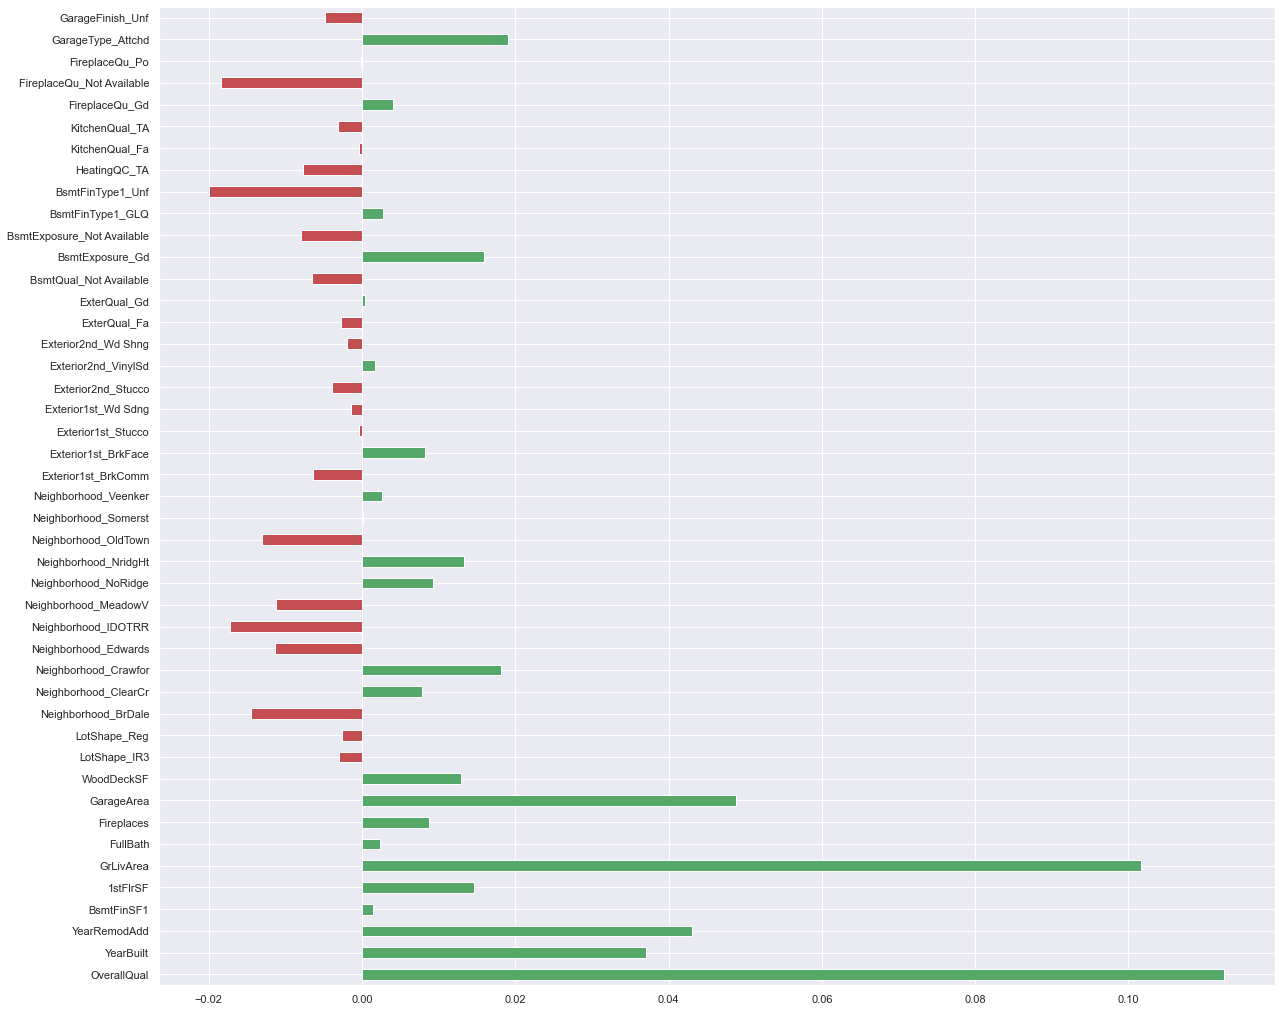

In [154]:
# Ploting all the features of lasso regression where cofficient value is > 0
lasso_features =  lasso_coef[abs(lasso_coef[lasso_coef != 0]).index]
plt.figure(figsize=(20, 18))
lasso_features.plot.barh(color=(lasso_features > 0).map({True: 'g', False: 'r'}))
plt.show()

- Optimal alpha (lambda) value for Ridge Regression model is: 100
- Optimal alpha (lambda) value for Lasso Regression model is: 0.01

### Suggestions


Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.

The higher values of positive coeeficients suggest a high sale value.

##### Some of those features are:-
 |  Feature  |  Description  |
 |  ---  |  ---  |
 |  OverallQual  |  Rates the overall material and finish of the house  |
 |  GrLivArea    |  Above grade (ground) living area square feet  |
 |  GarageArea   |Size of garage in square feet  |
 |  YearRemodAdd |  Remodel date (same as construction date if no remodeling or additions)  |
 |  YearBuilt  |  Original construction date  |
 
        

The higher values of negative coeeficients suggest a decrease in sale value.


### Assignment II

### Scenario 1:  What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [155]:
## Doubling value of optimal alpha in Ridge
ridge2 = Ridge(alpha=200, random_state=100)
ridge2.fit(X_train, y_train)

Ridge(alpha=200, random_state=100)

In [156]:
# calculate metrics such as R2 score, RSS, MSE and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

print("For Ridge Regression (Doubled Alpha Model, alpha=2*100=200) Model Metrics")
print("Tarining Data Metrics:")
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score: ", r2_train_lr)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Value: ", rss1_lr)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Value: ", mse_train_lr)
rmse_train_lr = mse_train_lr**0.5
print("RMSE Value: ", rmse_train_lr)

print("\nTest Data Metrics:")
r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score: ", r2_test_lr)
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Value: ", rss2_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Value: ", mse_test_lr)
rmse_test_lr = mse_test_lr**0.5
print("RMSE Value: ", rmse_test_lr)

For Ridge Regression (Doubled Alpha Model, alpha=2*100=200) Model Metrics
Tarining Data Metrics:
R2 Score:  0.8831921178110138
RSS Value:  18.746758930753824
MSE Value:  0.018361174271061532
RMSE Value:  0.135503410551401

Test Data Metrics:
R2 Score:  0.8564896847906498
RSS Value:  10.342583346532855
MSE Value:  0.023613203987517935
RMSE Value:  0.15366588426686625


In [157]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef2 = pd.Series(ridge2.coef_, index=X_train.columns)
top10_ridge2 =  ridge_coef2[abs(ridge_coef2).nlargest(10).index]
print(list(top10_ridge2.index))

['OverallQual', 'GrLivArea', '1stFlrSF', 'GarageArea', 'YearRemodAdd', '2ndFlrSF', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_MeadowV', 'Neighborhood_IDOTRR']


In [158]:
# calculate metrics for orignal model such as R2 score, RSS, MSE and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print("For Ridge Regression (Original Model, alpha=100) Model Metrics")
print("Tarining Data Metrics:")
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score: ", r2_train_lr)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Value: ", rss1_lr)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Value: ", mse_train_lr)
rmse_train_lr = mse_train_lr**0.5
print("RMSE Value: ", rmse_train_lr)

print("\nTest Data Metrics:")
r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score: ", r2_test_lr)
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Value: ", rss2_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Value: ", mse_test_lr)
rmse_test_lr = mse_test_lr**0.5
print("RMSE Value: ", rmse_test_lr)

For Ridge Regression (Original Model, alpha=100) Model Metrics
Tarining Data Metrics:
R2 Score:  0.8876409164998031
RSS Value:  18.032761253651422
MSE Value:  0.017661862148532246
RMSE Value:  0.132897938842302

Test Data Metrics:
R2 Score:  0.8584002871954429
RSS Value:  10.204888961395227
MSE Value:  0.02329883324519458
RMSE Value:  0.15263955334445453


In [159]:
## Doubling value of optimal alpha in Lasso
lasso2 = Lasso(alpha=.02, random_state=100)
lasso2.fit(X_train, y_train)

Lasso(alpha=0.02, random_state=100)

In [160]:
# calculate metrics such as R2 score, RSS, MSE and RMSE
y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

print("For Lasso Regression (Doubled alpha model, alpha=2*0.01=0.02) Model Metrics")
print("Tarining Data Metrics:")
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score: ", r2_train_lr)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Value: ", rss1_lr)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Value: ", mse_train_lr)
rmse_train_lr = mse_train_lr**0.5
print("RMSE Value: ", rmse_train_lr)

print("\nTest Data Metrics:")
r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score: ", r2_test_lr)
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Value: ", rss2_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Value: ", mse_test_lr)
rmse_test_lr = mse_test_lr**0.5
print("RMSE Value: ", rmse_test_lr)

For Lasso Regression (Doubled alpha model, alpha=2*0.01=0.02) Model Metrics
Tarining Data Metrics:
R2 Score:  0.8401048376851421
RSS Value:  25.661933132737083
MSE Value:  0.025134116682406546
RMSE Value:  0.15853742990980568

Test Data Metrics:
R2 Score:  0.8325081319326475
RSS Value:  12.070899592311772
MSE Value:  0.02755913148929628
RMSE Value:  0.1660094319287199


In [161]:
# Top 10 features with double the value of optimal alpha in Lasso
lasso_coef2 = pd.Series(lasso2.coef_, index=X_train.columns)
top10_lasso2 =  lasso_coef2[abs(lasso_coef2[lasso_coef2 != 0]).nlargest(10).index]
print(list(top10_lasso2.index))

['OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GarageType_Attchd', 'FireplaceQu_Not Available', 'Fireplaces', 'BsmtExposure_Gd']


In [162]:
# calculate metrics for original model such as R2 score, RSS, MSE and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print("For Lasso Regression (Original Model, alpha=0.01) Model Metrics")
print("Tarining Data Metrics:")
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score: ", r2_train_lr)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Value: ", rss1_lr)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Value: ", mse_train_lr)
rmse_train_lr = mse_train_lr**0.5
print("RMSE Value: ", rmse_train_lr)

print("\nTest Data Metrics:")
r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score: ", r2_test_lr)
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Value: ", rss2_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Value: ", mse_test_lr)
rmse_test_lr = mse_test_lr**0.5
print("RMSE Value: ", rmse_test_lr)

For Lasso Regression (Original Model, alpha=0.01) Model Metrics
Tarining Data Metrics:
R2 Score:  0.8656033582678043
RSS Value:  21.569618389108392
MSE Value:  0.021125972957011158
RMSE Value:  0.14534776557281903

Test Data Metrics:
R2 Score:  0.852957805882874
RSS Value:  10.597120812499995
MSE Value:  0.024194339754566196
RMSE Value:  0.15554529807926112


### Scenario 2: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [163]:
# Top 5 features in Lasso
lasso_coef = pd.Series(lasso.coef_, index= X_train.columns)
top5_lasso =  lasso_coef[abs(lasso_coef).nlargest(5).index]
list(top5_lasso.index)

['OverallQual', 'GrLivArea', 'GarageArea', 'YearRemodAdd', 'YearBuilt']

In [164]:
cols_to_drop = list(top5_lasso.index)
cols_to_drop

['OverallQual', 'GrLivArea', 'GarageArea', 'YearRemodAdd', 'YearBuilt']

In [165]:
# Droping above features from X_train and X_test
X_train = X_train.drop(cols_to_drop, axis=1)
X_test = X_test.drop(cols_to_drop, axis=1)
X_train.shape, X_test.shape

((1021, 118), (438, 118))

In [166]:
# Building Lasso model with these features
lasso3 = Lasso(alpha=0.01, random_state=100)
lasso3.fit(X_train, y_train)

Lasso(alpha=0.01, random_state=100)

In [167]:
# Top 5 features after droping top 5 features of Previous Lasso model
lasso_coef3 = pd.Series(lasso3.coef_, index=X_train.columns)
top5_lasso3 =  lasso_coef3[abs(lasso_coef3[lasso_coef3 != 0]).nlargest(5).index]
print(list(top5_lasso3.index))

['1stFlrSF', '2ndFlrSF', 'Neighborhood_NridgHt', 'KitchenQual_TA', 'FireplaceQu_Not Available']
